## Observations and Insights 

In [174]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how="outer")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df["Duplicate?"] = df.duplicated(subset=['Mouse ID', 'Timepoint'])
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_df = df.loc[(df['Duplicate?'] == True)]
Duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanDF = df.loc[(df['Duplicate?'] == False)]

In [94]:
# Checking the number of mice in the clean DataFrame.
CleanDF["Mouse ID"].nunique() 

249

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Group by Drug Regimen
grouped_df = CleanDF.groupby("Drug Regimen")

# Mean
TumorMean = grouped_df["Tumor Volume (mm3)"].mean()
# Median
TumorMedian = grouped_df["Tumor Volume (mm3)"].median()
# Variance
TumorVar = grouped_df["Tumor Volume (mm3)"].var()
# Standard deviation
TumorSTD = grouped_df["Tumor Volume (mm3)"].std()
# SEM
TumorSEM = grouped_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
TumorSummary5 = pd.merge(TumorMean, TumorMedian, on="Drug Regimen")
TumorSummary5 = TumorSummary5.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
TumorSummary4 = pd.merge(TumorSummary5, TumorVar, on="Drug Regimen")
TumorSummary4 = TumorSummary4.rename(columns = {"Tumor Volume (mm3)": "Variance"})
TumorSummary3 = pd.merge(TumorSummary4, TumorSTD, on="Drug Regimen")
TumorSummary3 = TumorSummary3.rename(columns = {"Tumor Volume (mm3)": "STD"})
TumorSummary2 = pd.merge(TumorSummary3, TumorSEM, on="Drug Regimen")
TumorSummary2 = TumorSummary2.rename(columns = {"Tumor Volume (mm3)": "SEM"})

TumorSummary2

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
TumorSummary = grouped_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
TumorSummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements Taken by Drug'}, xlabel='Drug Regimen', ylabel='# of Measurements'>

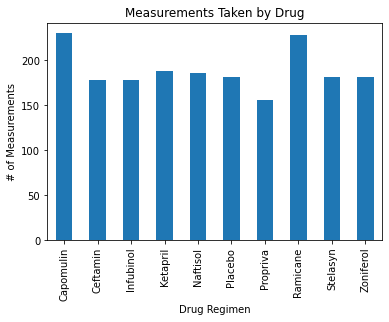

In [163]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
BarChart_df = CleanDF.groupby(['Drug Regimen']).size()
BarChart_pa = BarChart_df.plot.bar(rot=90)
plt.title("Measurements Taken by Drug")
plt.ylabel("# of Measurements")
BarChart_pa

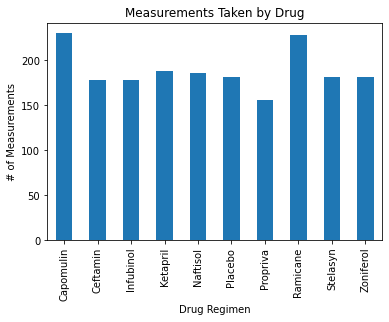

In [164]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
BarChart = CleanDF.groupby('Drug Regimen')['Mouse ID'].count().plot(kind='bar')
plt.title("Measurements Taken by Drug")
plt.ylabel("# of Measurements")
plt.show()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



ValueError: x must be 1D

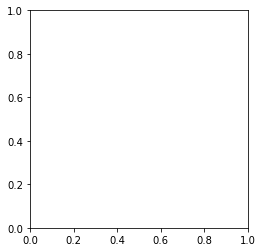

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = CleanDF.groupby('Sex')
sizes = labels.count()
plt.pie(sizes, labels = labels)
plt.show


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
